# Dual numbers and gradient descent

Dual numbers are very interesting constructs. They can be implemented in Julia without much overhead. You can read more about them here: [wikipedia](https://en.wikipedia.org/wiki/Dual_number#Differentiation), [DualNumbers.jl package](https://github.com/JuliaDiff/DualNumbers.jl), [Alan Edelman - automatic differentiation](https://github.com/alanedelman/YouTubeNotebooks/blob/master/Automatic%20Differentiation%20in%2010%20Minutes.ipynb).

In [22]:
using Plots
pyplot()
Plots.PyPlotBackend();

In [1]:
# define Dual datatype, 
# it could be done in more efficient way
struct Dual <: Number
    x
    y
end
# outer constructor
Dual(x) = Dual(x, zero(x))

Dual

In [2]:
import Base: +, -, *, /
# overwrite arithmetic operators
+(a::Dual, b::Dual) = Dual(a.x + b.x, a.y + b.y)
-(a::Dual, b::Dual) = Dual(a.x - b.x, a.y - b.y)
*(a::Dual, b::Dual) = Dual(a.x * b.x, a.y * b.x + b.y * a.x)
/(a::Dual, b::Dual) = Dual(a.x / b.x, (a.y * b.x  + b.y * a.x) / (b.x)^2 )

# make them compatible with numbers
import Base: promote_rule, convert
convert(::Type{Dual}, x::T) where T <: Number = Dual(x)
promote_rule(::Type{Dual}, ::Type{T}) where T <: Number = Dual
Dual(x::Dual) = x

Dual

In [3]:
# by the definition of dual numbers,
# ∇ should return the gradient of a polynomial function f(x,y)
∇(f) = (x,y) -> [f(Dual(x,1),y).y , f(x, Dual(y,1)).y ]

∇ (generic function with 1 method)

In [4]:
f(x,y) = 2x + y^3
∇(f)(5,2)

2-element Array{Int64,1}:
  2
 12

In [15]:
function grad_descent(f,τ, num_steps; plot=true)
    min_point = rand(2)
    if plot
        scatter(Tuple(min_point),legend=false)
    end
    
    for i in 1:num_steps
        min_point -= τ * ∇(f)(min_point...)

        if plot && i % 10 == 0
            scatter!(Tuple(min_point),legend=false)
        end
    end
    min_point
end

grad_descent (generic function with 1 method)

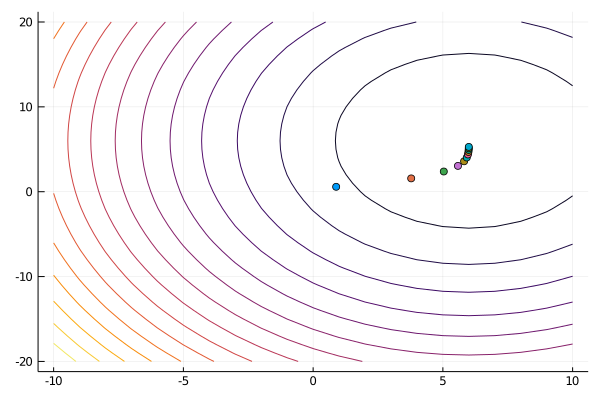

In [19]:
g(x,y) = 4(x-6)^2 + (y-6)^2
grad_descent(g, 0.01, 10^2)

contour!(-10:10,-20:20, g)

We can try to use our functions to search for the best linear fit. (linear regression)

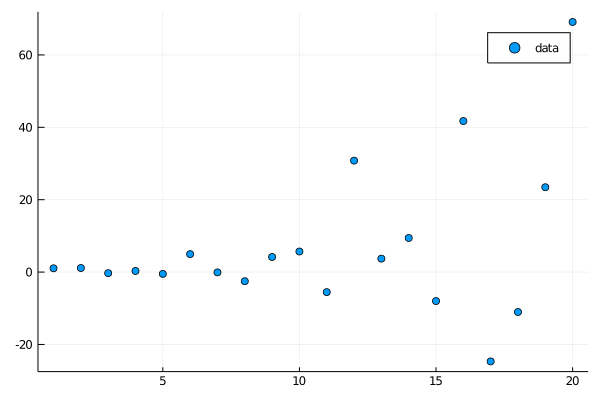

In [20]:
# dummy data of length n
n = 20
data =  [0.2*i + 0.1 * i^2 * randn() + rand() for i in 1:20]
scatter(data, label="data")

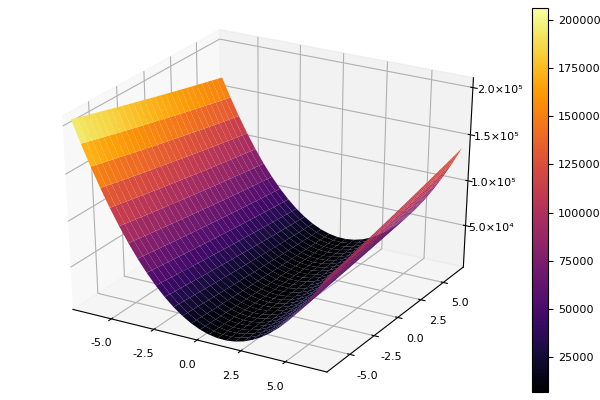

In [30]:
# cost function
# model: y = ax + b
cost(a,b) = sum([ (a*i + b - data[i])^2 for i in 1:n ])
# how does it look like?
surface(-7:0.5:7, -7:0.5:7, cost)

In [32]:
a,b = grad_descent(cost, 0.0001, 10^4)
# our model
f(x) = a*x + b

f (generic function with 2 methods)

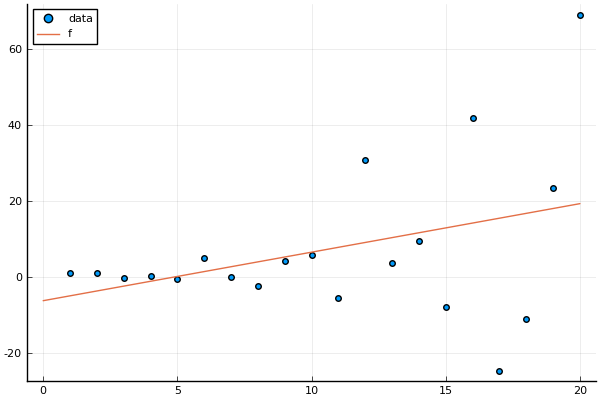

In [33]:
scatter(data, label="data")
plot!(0:0.1:n,f, label="f")

Thanks for reading.